In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import json

# Synthesize dataset

## Init

In [9]:
#init cluster means
cluster_means = np.array([(-7.5, -7.5),(-7.5, -2.5),(-7.5, 2.5),(-7.5, 7.5),(-2.5, -7.5),(-2.5, -2.5),(-2.5, 2.5), (-2.5, 7.5), (2.5, -7.5), (2.5, -2.5), (2.5, 2.5), (2.5, 7.5), (7.5, -7.5), (7.5, -2.5), (7.5, 2.5), (7.5, 7.5)])
#cluster_means_diag = np.array([(10, -10), (0, -10), (10, 0), (5,-5),(-5,5),(0,-0),  (-5, 0),(0, 5), (-5, 0), (10,-5), (5, -10), (5,0), (0, -5), (-10, 10), (-10, 5), (-10, 0), (-5,10), (-5,5),(-5,0), (0,10) ])
cluster_means_diag = np.array([(-10,10), (-10, 5), (-10, 0), (-5, 10), (-5,5),(-5,0), (0,10), (0,5), (0,0), (0,-5), (0,-10), (5,0), (5,-5), (5,-10), (10, 0), (10,-5), (10,-10)])
cluster_means_super_diag = np.array([(-20, 20), (-10, 10), (-15, 5), (0, 0),(0, -5), (0, -10), (5, -5), (5, 0), (5, -10), (10, 0), (10, -5), (10, -10)])

In [3]:
# generate observer locations
n_obs = 5
observers = np.empty((2,n_obs))

# random assignment of observers;  
for i_obs in range(n_obs):
    observers[:,i_obs] = np.random.uniform(low=-10, high=10, size = 2)

# for reproducability of the original dataset, load these observer locations
observers = np.genfromtxt("data/observer_locations.csv", delimiter = ",").T

In [4]:
# regenerate observers for 'super diag' dataset
n_obs = 5
observers_super_diag = np.empty((2,n_obs))
np.random.seed(42)
# random assignment of observers;  
for i_obs in range(n_obs):
    observers_super_diag[0, i_obs] = np.random.uniform(low=-20, high=10, size = 1)
    observers_super_diag[1, i_obs] = np.random.uniform(low=-10, high=20, size = 1)


np.savetxt("data/observer_super_diag_locations.csv", observers_super_diag)

## 'Base', with different betas

In [5]:
observers = np.genfromtxt("data/observer_locations.csv", delimiter = ",").T
cluster_means = np.array([(-7.5, -7.5),(-7.5, -2.5),(-7.5, 2.5),(-7.5, 7.5),(-2.5, -7.5),(-2.5, -2.5),(-2.5, 2.5), (-2.5, 7.5), (2.5, -7.5), (2.5, -2.5), (2.5, 2.5), (2.5, 7.5), (7.5, -7.5), (7.5, -2.5), (7.5, 2.5), (7.5, 7.5)])

In [31]:
beta = 0.1
points_per_cluster = 50
noise = 1

dset = create_dataset(beta, cluster_means, noise, points_per_cluster, observers)

In [ ]:
''' # old implementation
beta = str(dset['beta'])
for i, obs in enumerate(dset['obs']):
    data_name = "cluster_diag_beta"  + beta + "_client" + str(i) + ".csv"
    label_name = "labels_diag_beta" + beta + "_client" + str(i) + ".csv"
    np.savetxt(data_name, np.array(obs['data']), delimiter=',')
    np.savetxt(label_name, np.array(obs['labels']), delimiter=",")
'''    

## non Uniform

In [50]:
beta = 0.00001

#observers = np.genfromtxt("data/observer_locations.csv", delimiter = ",").T

data_super_diag, labels_super_diag = generate_data(cluster_means_super_diag)
obs_super_diag = assign_data(observers_super_diag, beta, data_super_diag, labels_super_diag)


## Local cluster varying

In [22]:
cluster_amts = np.array([16, 1, 3, 10, 7])

clients_cluster_wise = generate_and_assign(cluster_means, cluster_amts, points_per_cluster = 50)



## Varying points per cluster/noise/beta

In [6]:
observers = np.genfromtxt("data/observer_locations.csv", delimiter = ",").T
cluster_means = np.array([(-7.5, -7.5),(-7.5, -2.5),(-7.5, 2.5),(-7.5, 7.5),(-2.5, -7.5),(-2.5, -2.5),(-2.5, 2.5), (-2.5, 7.5), (2.5, -7.5), (2.5, -2.5), (2.5, 2.5), (2.5, 7.5), (7.5, -7.5), (7.5, -2.5), (7.5, 2.5), (7.5, 7.5)])

In [100]:
beta = 10
points_per_cluster = 200
noise = 1.5


data, labels = generate_data(cluster_means, points_per_cluster, noise)
obs = assign_data(observers, beta, data, labels)


In [101]:
save_str = "beta" + str(beta) + "_ppc" + str(points_per_cluster) + "_noise" + str(noise) + "_client" 


for i, ob in enumerate(obs):
    data_name = "cluster_" + save_str + str(i) + ".csv"
    label_name = "labels_" + save_str + str(i) + ".csv"
    np.savetxt(data_name, np.array(ob['data']), delimiter=',')
    np.savetxt(label_name, np.array(ob['labels']), delimiter=",")

Text(0.5, 1.0, 'ppc = 100, noise = 1, beta = 0.01')

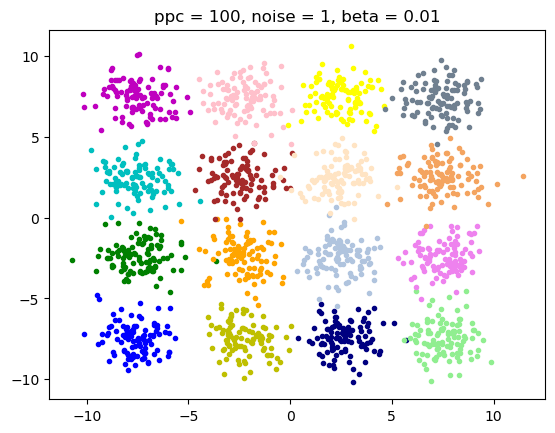

In [13]:
colors = ['b', 'g', 'c', 'm', 'y', 'orange', 'brown',
              'pink', 'navy', 'lightsteelblue', 'bisque', 'yellow', 'lightgreen', 'violet', 'sandybrown', 'slategrey', 'black']

for i, ob in enumerate(obs):
    #data, labels = load_data(i, "abl", beta=beta, ppc=ppc, noise=noise)
    data_arr = np.array(ob['data'])
    for point, label in zip(data_arr, ob['labels']):
        plt.plot(point[0], point[1], '.', color = colors[int(label)%len(colors)])
    #plt.plot(np.array(ob['data'])[:,0], np.array(ob['data'])[:,1],".", color = colors[int(label)%5])
plt.title("ppc = " +  str(points_per_cluster) + ", noise = "+ str(noise) + ", beta = "+ str(beta))
#plt.savefig("ci_dist.eps",format = "eps")

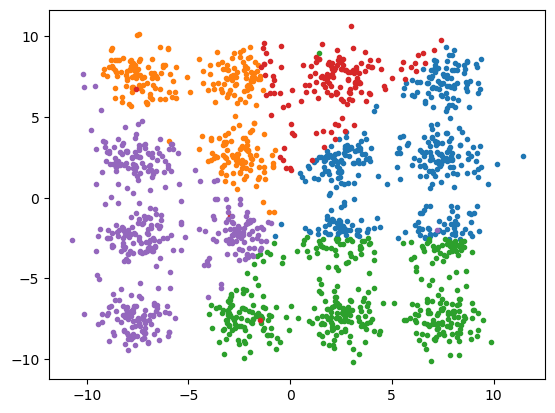

In [14]:
for i, ob in enumerate(obs):
    plt.plot(np.array(ob['data'])[:,0], np.array(ob['data'])[:,1], '.')

## Varying Noise

## Unused

In [12]:
beta = 0.1

observers = np.genfromtxt("data/observer_locations.csv", delimiter = ",").T

data_diag, labels_diag = generate_data(cluster_means_diag)
obs_diag = assign_data(observers, beta, data_diag, labels_diag)

## visualizations

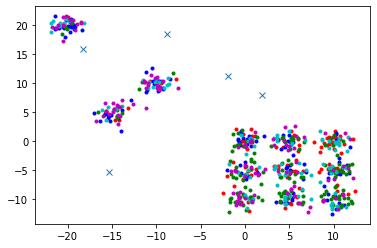

In [51]:
colors = ['r', 'b', 'g', 'c', 'm']
for c, obs in zip(colors, obs_super_diag):
    for point in obs['data']:
        plt.plot(point[0], point[1], '.',color = c)
plt.plot(observers_super_diag[0,:], observers_super_diag[1,:], 'x')

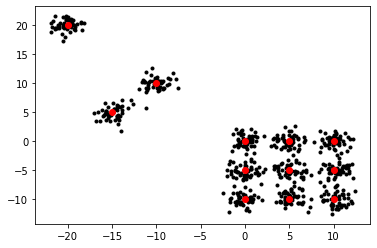

In [27]:
plt.plot(data_super_diag[0,:], data_super_diag[1,:], '.', c='black')
#plt.plot(observers[0,:], observers[1,:], 'x', c='blue')
for mean in cluster_means_super_diag:
    plt.plot(mean[0], mean[1], 'o', c='red')

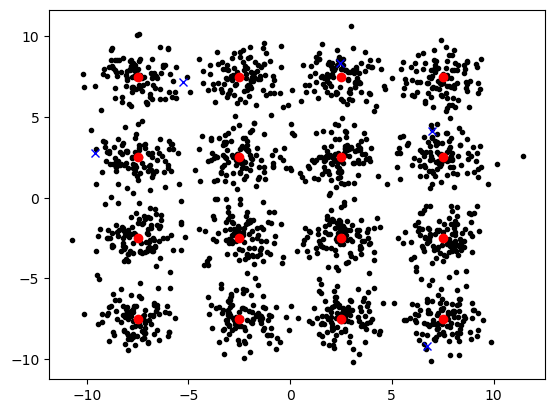

In [18]:
plt.plot(data[0,:], data[1,:], '.', c='black')
plt.plot(observers[0,:], observers[1,:], 'x', c='blue')
for mean in cluster_means:
    plt.plot(mean[0], mean[1], 'o', c='red')

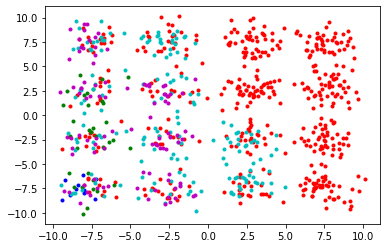

In [24]:
colors = ['r', 'b', 'g', 'c', 'm']
for c, obs in zip(colors, clients_cluster_wise):
    for point in obs['data']:
        plt.plot(point[0], point[1], '.',color = c)


In [2]:
def create_dataset(beta, cluster_means, noise, points_per_mean, observers):
    data, labels = generate_data(cluster_means, n_per_cluster, noise)
    obs = assign_data(observers, beta, data, labels)
    
    return {
        'obs' : obs,
        'beta' : beta,
        'ppm' : points_per_mean,
        'noise' : noise
    }

In [3]:
def generate_data(cluster_means, points_per_mean = 50, noise = 1):
    data = np.empty((2,points_per_mean * len(cluster_means)))
    labels = np.zeros((points_per_mean*len(cluster_means))) # these are purely used for calculating the rand index
    np.random.seed(42)
    for mean_i, mean in enumerate(cluster_means):
        points_x = np.random.normal(loc=mean[0], size=points_per_mean, scale = noise)
        points_y = np.random.normal(loc=mean[1], size=points_per_mean, scale = noise)
        data[:,mean_i*points_per_mean:mean_i*points_per_mean+points_per_mean] = [points_x, points_y]
        labels[mean_i*points_per_mean:mean_i*points_per_mean+points_per_mean] = mean_i
    return data, labels

In [4]:
def generate_and_assign(cluster_means, cluster_amts, points_per_cluster = 50, reverse_order = False):

    np.random.seed(42)
    c_client_total = np.sum(cluster_amts) # total amount of clusters 'seen' by all clients combined
    c_total = len(cluster_means) # total amount of globally existing clusters
    n_clients = len(cluster_amts)
    client_list = []
    for i in range(n_clients):
         client_list.append({
            'data' : [],
            'labels' : []
         })
    clients = np.array(client_list)
    
    for mean_i, mean in enumerate(cluster_means):
        points_x = np.random.normal(loc=mean[0], size=points_per_cluster)
        points_y = np.random.normal(loc=mean[1], size=points_per_cluster)
        
        divert = np.where(cluster_amts != 0)[0].astype(int)
        
        #print(divert)
        points_per_client = math.floor(points_per_cluster/len(divert))
        #print(points_per_client)
        #print(clients[divert])
        for client_i, client in enumerate(clients[divert]):
            
            start = client_i * points_per_client
            finish = (client_i + 1) * points_per_client
            points_x_sel = points_x[start:finish]
            points_y_sel = points_y[start:finish]
            #print(start, finish)
            for x, y in zip(points_x_sel, points_y_sel):
                datapoint = [x,y]
                client['data'].append(datapoint)
            client['labels'].extend([int(mean_i) for i in range(points_per_client)])
            
        cluster_amts[divert] -= 1
    return clients

In [5]:
def assign_data(observer_locs, beta, data, labels):
    obs1 = {
        'loc' : np.array([observers[0,0], observers[1,0]]),
        'data': [],
        'labels' : [],
    }

    obs2 = {
        'loc' : np.array([observers[0,1], observers[1,1]]),
        'data': [],
        'labels' : [],
    }

    obs3 = {
        'loc' : np.array([observers[0,2], observers[1,2]]),
        'data': [],
        'labels' : [],
    }

    obs4 = {
        'loc' : np.array([observers[0,3], observers[1,3]]),
        'data': [],
        'labels' : [],
    }

    obs5 = {
        'loc' : np.array([observers[0,4], observers[1,4]]),
        'data': [],
        'labels' : [],
    }

    observer_list = np.array([obs1, obs2, obs3, obs4, obs5])
    data_total = data.shape[1]

    for i in range(data_total):
        data_point = [data[0,i], data[1,i]]
        label = labels[i]
        hits = np.zeros([5], dtype=bool)
        dists = np.zeros([5])
        for obs_i, obs in enumerate(observer_list):
            dists[obs_i] = np.linalg.norm(obs['loc'] - np.array([data[0,i], data[1,i]]))
            obs_probab = 1-math.exp(-(beta) / dists[obs_i])
            hits[obs_i] = np.random.choice([0, 1], p=[1-obs_probab, obs_probab])
        if np.sum(hits) == 0: # if nobody hits, just give the point to the closest observer
            obs = observer_list[np.argmin(dists)]
            obs['data'].append(data_point)
            obs['labels'].append(label)
        else: #if one or more parties hit, give it to the furthest observer
            #print(observer_list[hits])
            # pick random if more than one hits
            furthest_obs = np.random.choice(observer_list[hits])
            #furthest_obs = observer_list[np.argmax(dists[hits])]
            furthest_obs['data'].append(data_point)
            furthest_obs['labels'].append(label)
            
    return observer_list

In [12]:
observers = np.genfromtxt("data/observer_locations.csv", delimiter = ",").T
beta = 1
obs_list = partition_data(observers, data_diag, labels_diag, beta)

NameError: name 'partition_data' is not defined

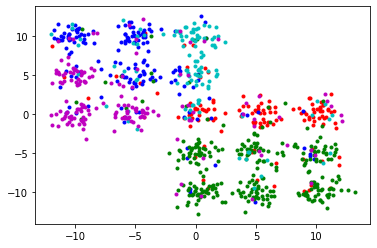

In [78]:
colors = ['r', 'b', 'g', 'c', 'm']
for c, obs in zip(colors, obs_list):
    for point in obs['data']:
        plt.plot(point[0], point[1], '.',color = c)


In [20]:
colors = ['r', 'b', 'g', 'c', 'm']
for color, obs in  zip(colors, observer_list):
    plt.plot(obs['loc'][0], obs['loc'][1],'x', color=color)
    for datapoint in obs['data']:
        plt.plot(datapoint[0], datapoint[1], '.', color=color)
#plt.legend()

NameError: name 'observer_list' is not defined

## save dataset

In [23]:
for i, obs in enumerate(clients_cluster_wise):
    data_name = "cluster_wise_client" + str(i) + ".csv"
    label_name = "labels_cluster_wise_client" + str(i) + ".csv"
    np.savetxt(data_name, np.array(obs['data']), delimiter=',')
    np.savetxt(label_name, np.array(obs['labels']), delimiter=",")

In [ ]:
for i, obs in enumerate(obs_super_diag):
    data_name = "cluster_super_diag_beta1e-5_client" + str(i) + ".csv"
    label_name = "labels_super_diag_beta1e-5_client" + str(i) + ".csv"
    np.savetxt(data_name, np.array(obs['data']), delimiter=',')
    np.savetxt(label_name, np.array(obs['labels']), delimiter=",")

In [79]:
for i, obs in enumerate(obs_list):
    data_name = "cluster_diag_beta1_client" + str(i) + ".csv"
    label_name = "labels_diag_beta1_client" + str(i) + ".csv"
    np.savetxt(data_name, np.array(obs['data']), delimiter=',')
    np.savetxt(label_name, np.array(obs['labels']), delimiter=",")

In [68]:
for i, obs in enumerate(observer_list):
    data_name = "cluster_beta10_client" + str(i) + ".csv"
    label_name = "labels_beta10_client" + str(i) + ".csv"
    np.savetxt(data_name, np.array(obs['data']), delimiter=',')
    np.savetxt(label_name, np.array(obs['labels']), delimiter=",")

In [28]:
# for reproducability/making the graphs, lets save the locations of the observers as well
obs_locs = np.array([obs['loc'] for obs in observer_list])
np.savetxt("observer_locations.csv", obs_locs, delimiter=",")

## Paper visualizations

In [6]:
def load_full_data(beta):
    cwd = os.getcwd()

    #this one will be used for assigning data to a client
    datafiles = [cwd + "/data/beta" + str(beta) + "/cluster_beta" + str(beta) + "_client" + str(i) + ".csv" for i in range(5)]
    labelfiles = [cwd + "/data/beta" + str(beta) + "/labels_beta" + str(beta) + "_client" + str(i) + ".csv" for i in range(5)]
    
    #create full dataset for comparison
    for i, file in enumerate(datafiles):
        data = np.genfromtxt(datafiles[i], delimiter=',')
        labels = np.genfromtxt(labelfiles[i], delimiter=',')
        #print(data.shape)
        if i == 0:
            data_full = data
            labels_full = labels
        else:
            data_full = np.concatenate((data, data_full), axis = 0)
            labels_full = np.concatenate((labels, labels_full), axis=0)

    return data_full, labels_full

In [7]:
def load_data(beta, i, ):
    cwd = os.getcwd()

    datafile = cwd + "/data/beta" + str(beta) + "/cluster_beta" + str(beta) + "_client" + str(i) + ".csv" 
    labelfile = cwd + "/data/beta" + str(beta) + "/labels_beta" + str(beta) + "_client" + str(i) + ".csv" 
    
#     datafile = f'{cwd}/data/beta/{str(beta)}/cluster_beta{str(beta)}_ppc{str(ppc)_noise{str(n)}}
    
    data = np.genfromtxt(datafile, delimiter=',')
    labels = np.genfromtxt(labelfile, delimiter=',') 
    
    return data, labels

In [14]:
def load_noisy_data(beta, i, n = 1.1, ppc = 50):
    cwd = os.getcwd()

#     datafile = cwd + "/data/beta" + str(beta) + "/cluster_beta" + str(beta) + "_client" + str(i) + ".csv" 
    labelfile = cwd + "/data/beta" + str(beta) + "/labels_beta" + str(beta) + "_client" + str(i) + ".csv" 
    
    datafile = f'{cwd}/data/beta{str(beta)}/cluster_beta{str(beta)}_ppc{str(ppc)}_noise{str(n)}_client{str(i)}.csv'
    
    data = np.genfromtxt(datafile, delimiter=',')
    labels = np.genfromtxt(labelfile, delimiter=',') 
    
    return data, labels

In [14]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

NameError: name 'cluster_means' is not defined

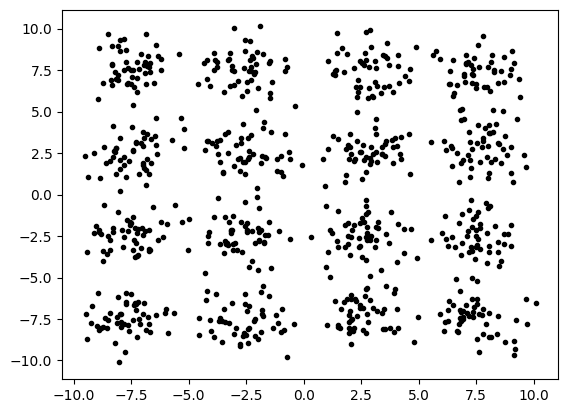

In [15]:
beta = 0.1

data_full, labels_full = load_full_data(beta)

plt.plot(data_full[:,0], data_full[:,1], ".", color="black")
plt.plot(cluster_means[:,0], cluster_means[:,1], 'o', color='red', label="cluster means")

plt.grid(True)
#plt.legend(loc= "lower right",  bbox_to_anchor = (1.34, 0))
#plt.legend(loc="lower right")
plt.title("full dataset including sample origins")
#plt.xlabel("$X_1$")
#plt.ylabel("$X_2$")
plt.savefig("full_dataset.eps", format="eps")


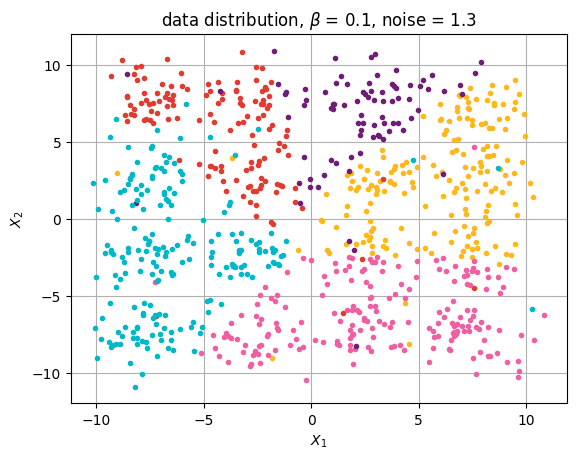

In [22]:
beta = 0.1
noise = 1.3

mean_colors = [(255, 184, 28), (224, 60, 49), (239, 96, 163), (111, 29, 119), (0, 184, 200)]
c_conv = [tuple(ti / 255 for ti in tup) for tup in mean_colors]

colors = ['r', 'b', 'g', 'c', 'm']

for i in range(5):
    data, labels = load_noisy_data(beta, i, n = noise, ppc = 50)
    
    plt.plot(data[:,0], data[:,1], ".", color=c_conv[i], label = "client " + str(i))
# plt.grid(True)
plt.title(r"data distribution, $\beta$ = " + str(beta) + f", noise = {noise}")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid()
# plt.savefig("data_dis

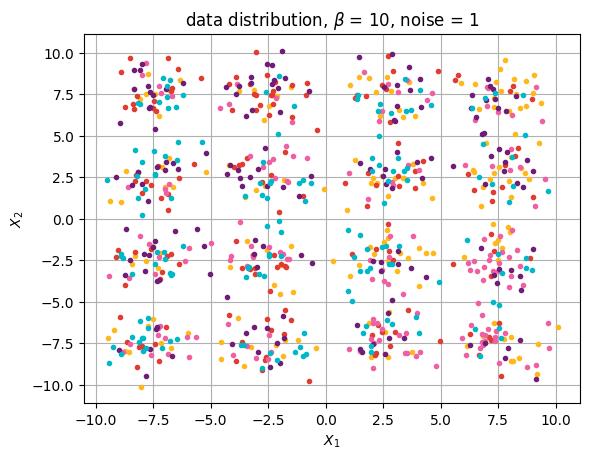

In [25]:
beta = 10


mean_colors = [(255, 184, 28), (224, 60, 49), (239, 96, 163), (111, 29, 119), (0, 184, 200)]
c_conv = [tuple(ti / 255 for ti in tup) for tup in mean_colors]

colors = ['r', 'b', 'g', 'c', 'm']

for i in range(5):
    data, labels = load_data(beta, i)
    
    plt.plot(data[:,0], data[:,1], ".", color=c_conv[i], label = "client " + str(i))
# plt.grid(True)
plt.title(r"data distribution, $\beta$ = " + str(beta) + ", noise = 1")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
# plt.savefig("data_dist_beta_" + str(beta) + ".eps", format="eps", bbox_inches="tight")
plt.grid()
#plt.legend()

In [6]:
client_paths = ["data/cluster2_client" + str(i) + ".csv" for i in range(5)]

client_data = []
for path in client_paths:
    client_data.append(np.genfromtxt(path, delimiter=","))
    
observers = np.genfromtxt("data/observer_locations.csv", delimiter = ",")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Text(12.25, 0.5, '$X_2$')

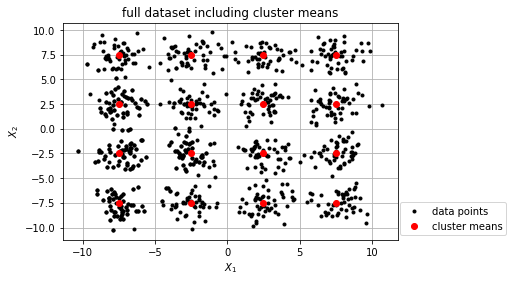

In [82]:
for i,  data in  enumerate(client_data):
    plt.plot(data[:,0], data[:,1], '.' , color='black')
plt.plot(data[:,0], data[:,1], '.' , color='black', label = "data points")

plt.plot(cluster_means[:,0], cluster_means[:,1], 'o', color='red', label="cluster means")
plt.grid(True)
plt.legend(loc= "lower right",  bbox_to_anchor = (1.34, 0))
#plt.legend(loc="lower right")
plt.title("full dataset including cluster means")
plt.savefig("full_dataset.eps", format="eps", bbox_inches="tight")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


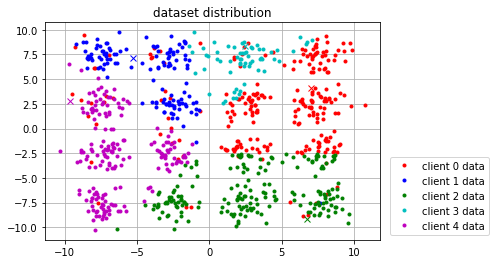

In [83]:
colors = ['r', 'b', 'g', 'c', 'm']
for i,  data in  enumerate( client_data):
    plt.plot(data[:,0], data[:,1], '.' , color=colors[i], label = "client " + str(i) + " data")
    #plt.plot(observers[i,0], observers[i, 1], 'x',  color=colors[i], label = "client " + str(i) + " location")
    plt.plot(observers[i,0], observers[i, 1], 'x',  color=colors[i])

plt.legend(loc="lower right", bbox_to_anchor = (1.34, 0))
plt.title("dataset distribution")
plt.grid(True)
plt.savefig("dataset_distribution.eps", format="eps", bbox_inches = "tight")